# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key


# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


626

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
#cit = cities
units = 'Imperial'
counts = 1

city_df = pd.DataFrame()

city_df['Cloudiness'] = ""
city_df['Country'] = ""
city_df['Humidity'] = ""
city_df['Lat'] = ""
city_df['Lng'] = ""
city_df['Max Temp'] = ""
city_df['Wind Speed'] = ""


#or cit,row in city_df.iterrows():
for cit in cities:    
    
    query_url = url + "appid=" + weather_api_key + "&q=" + cit + "&units=" + units
    weather = requests.get(query_url)
    weatherjson = weather.json()
       
    try:
        country = weatherjson['sys']['country']
        city_df.loc[cit,'Country'] = country
    except:
        city_df.loc[cit,'Country'] = ""
    
    try:
        max_temp = weatherjson['main']['temp_max']
        city_df.loc[cit,'Max Temp'] = max_temp
    except:
        city_df.loc[cit,'Max Temp'] = ""
    
    try:
        clouds = weatherjson['clouds']['all']
        city_df.loc[cit,'Cloudiness'] = clouds
    except:
        city_df.loc[cit,'Cloudiness'] = ""
    
    try:
        windspeed = weatherjson['wind']['speed']
        city_df.loc[cit,'Wind Speed'] = windspeed
    except:
        city_df.loc[cit,'Wind Speed'] = ""
    
    try:
        humidity = weatherjson['main']['humidity']
        city_df.loc[cit,'Humidity'] = humidity
    except:
        city_df.loc[cit,'Humidity'] = ""
    
    try:
        lat = weatherjson['coord']['lat']
        city_df.loc[cit,'Lat'] = lat
    except:
        city_df.loc[cit,'Lat'] = ""
    
    try:
        lon = weatherjson['coord']['lon']
        city_df.loc[cit,'Lng'] = lon
    except:
        city_df.loc[cit,'Lng'] = ""
    
    print(f'The city is {cit}. This is city {counts} of {len(cities)}')
    counts = counts + 1 
    

The city is rio grande. This is city 1 of 626
The city is punta arenas. This is city 2 of 626
The city is carnarvon. This is city 3 of 626
The city is arraial do cabo. This is city 4 of 626
The city is tuktoyaktuk. This is city 5 of 626
The city is boa vista. This is city 6 of 626
The city is mambajao. This is city 7 of 626
The city is puerto ayora. This is city 8 of 626
The city is korla. This is city 9 of 626
The city is lasa. This is city 10 of 626
The city is rikitea. This is city 11 of 626
The city is illoqqortoormiut. This is city 12 of 626
The city is kavieng. This is city 13 of 626
The city is hobyo. This is city 14 of 626
The city is ancud. This is city 15 of 626
The city is bredasdorp. This is city 16 of 626
The city is guatire. This is city 17 of 626
The city is roma. This is city 18 of 626
The city is albany. This is city 19 of 626
The city is attawapiskat. This is city 20 of 626
The city is dukat. This is city 21 of 626
The city is lebu. This is city 22 of 626
The city is 

The city is tandalti. This is city 181 of 626
The city is nikolskoye. This is city 182 of 626
The city is inhambane. This is city 183 of 626
The city is saint-francois. This is city 184 of 626
The city is mataura. This is city 185 of 626
The city is tasiilaq. This is city 186 of 626
The city is nome. This is city 187 of 626
The city is pacific grove. This is city 188 of 626
The city is aksarka. This is city 189 of 626
The city is mezen. This is city 190 of 626
The city is bolungarvik. This is city 191 of 626
The city is bargal. This is city 192 of 626
The city is severo-kurilsk. This is city 193 of 626
The city is muros. This is city 194 of 626
The city is isangel. This is city 195 of 626
The city is mys shmidta. This is city 196 of 626
The city is north bay. This is city 197 of 626
The city is northfield. This is city 198 of 626
The city is dire. This is city 199 of 626
The city is guilin. This is city 200 of 626
The city is calama. This is city 201 of 626
The city is matara. This is 

The city is neuquen. This is city 361 of 626
The city is leningradskiy. This is city 362 of 626
The city is saldanha. This is city 363 of 626
The city is bowen. This is city 364 of 626
The city is awbari. This is city 365 of 626
The city is smithers. This is city 366 of 626
The city is dubbo. This is city 367 of 626
The city is butaritari. This is city 368 of 626
The city is ilulissat. This is city 369 of 626
The city is kattivakkam. This is city 370 of 626
The city is outlook. This is city 371 of 626
The city is teguise. This is city 372 of 626
The city is rio gallegos. This is city 373 of 626
The city is olafsvik. This is city 374 of 626
The city is katsuura. This is city 375 of 626
The city is male. This is city 376 of 626
The city is greencastle. This is city 377 of 626
The city is roquetas de mar. This is city 378 of 626
The city is sept-iles. This is city 379 of 626
The city is pangnirtung. This is city 380 of 626
The city is umm kaddadah. This is city 381 of 626
The city is gera

The city is balotra. This is city 539 of 626
The city is rabo de peixe. This is city 540 of 626
The city is tiksi. This is city 541 of 626
The city is seoul. This is city 542 of 626
The city is antu. This is city 543 of 626
The city is pecos. This is city 544 of 626
The city is campoverde. This is city 545 of 626
The city is lompoc. This is city 546 of 626
The city is felidhoo. This is city 547 of 626
The city is orodara. This is city 548 of 626
The city is helena. This is city 549 of 626
The city is vigrestad. This is city 550 of 626
The city is touros. This is city 551 of 626
The city is champerico. This is city 552 of 626
The city is camacha. This is city 553 of 626
The city is domoni. This is city 554 of 626
The city is marsh harbour. This is city 555 of 626
The city is jumla. This is city 556 of 626
The city is abu dhabi. This is city 557 of 626
The city is key west. This is city 558 of 626
The city is alamos. This is city 559 of 626
The city is chute-aux-outardes. This is city 56

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
city_df.to_csv("cities.csv",index = True)
city_df.head()

,Cloudiness,Country,Humidity,Lat,Lng,Max Temp,Wind Speed
rio grande,90,BR,83,-32.03,-52.1,75.2,14.99
punta arenas,75,CL,58,-53.15,-70.92,59,21.92
carnarvon,75,AU,78,-24.87,113.63,77,8.05
arraial do cabo,40,BR,83,-22.97,-42.03,80.6,11.41
tuktoyaktuk,90,CA,79,69.45,-133.04,23,28.86


In [5]:
#Converting everything to numerical values for plots,
city_df.dropna()
city_df['Lat'] = pd.to_numeric(city_df['Lat'])
city_df['Lng'] = pd.to_numeric(city_df['Lng'])
city_df['Max Temp'] = pd.to_numeric(city_df['Max Temp'])
city_df['Wind Speed'] = pd.to_numeric(city_df['Wind Speed'])
city_df['Cloudiness'] = pd.to_numeric(city_df['Cloudiness'])
city_df['Humidity'] = pd.to_numeric(city_df['Humidity'])


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

<function matplotlib.pyplot.show(*args, **kw)>

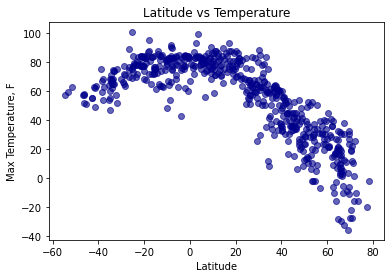

In [6]:
lat = city_df['Lat']
temp = city_df['Max Temp']
plt.scatter(lat,temp, marker = 'o', facecolors = 'darkblue', alpha = 0.6)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature, F')
plt.title('Latitude vs Temperature')
# Save the figure
plt.savefig("Lat_vs_Temp.png")
plt.show

#### Latitude vs. Humidity Plot

<function matplotlib.pyplot.show(*args, **kw)>

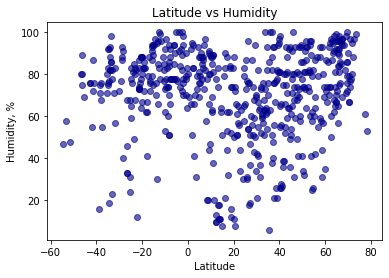

In [7]:
lat = city_df["Lat"]
hum = city_df['Humidity']
plt.scatter(lat,hum, marker = 'o', facecolors = 'darkblue', alpha = 0.6)
plt.xlabel('Latitude')
plt.ylabel('Humidity, %')
plt.title('Latitude vs Humidity')
plt.savefig("Latitude vs Humidity.png")
plt.show

#### Latitude vs. Cloudiness Plot

<function matplotlib.pyplot.show(*args, **kw)>

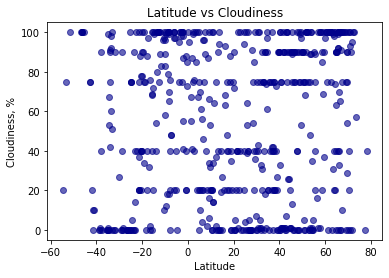

In [8]:
lat = city_df["Lat"]
clds = city_df['Cloudiness']
plt.scatter(lat,clds, marker = 'o', facecolors = 'darkblue', alpha = 0.6)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness, %')
plt.title('Latitude vs Cloudiness')
plt.savefig("Latitude vs Cloudiness.png")
plt.show

#### Latitude vs. Wind Speed Plot

<function matplotlib.pyplot.show(*args, **kw)>

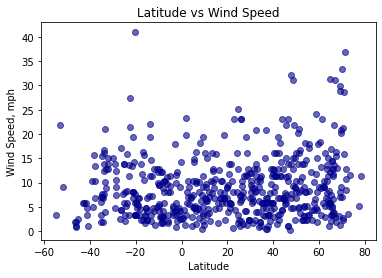

In [9]:
lat = city_df["Lat"]
wspd = city_df['Wind Speed']
plt.scatter(lat,wspd, marker = 'o', facecolors = 'darkblue', alpha = 0.6)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed, mph')
plt.title('Latitude vs Wind Speed')
plt.savefig("Latitude vs Wind Speed.png")
plt.show

## Linear Regression

In [38]:
# OPTIONAL: Create a function to create Linear Regression plots
from scipy import stats
def linreg(x_values,y_values):
    #The ‘linregress’ outputs 5 items (slope, intercept, rvalue, pvalue, stderr)
    (slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

    # Get regression values
    regress_values = x_values * slope + intercept

    # Create line equation string
    global line_eq
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

    # Create Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")

    #plt.annotate(line_eq,(0,0),fontsize=15,color="red")
    
    # Print r square value
    print(f"The r-squared is: {rvalue}")
    
 

In [32]:
# Create Northern and Southern Hemisphere DataFrames
Ncity = city_df.loc[city_df['Lat']>=0,:]
Scity = city_df.loc[city_df['Lat']<0,:]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8829786400619809


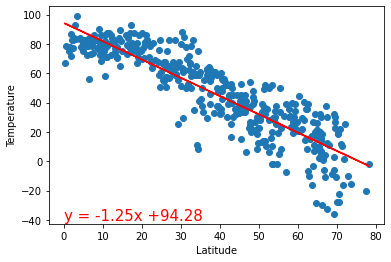

In [39]:

nLat = Ncity['Lat']
nTemp = Ncity['Max Temp']
linreg(nLat,nTemp)
# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.annotate(line_eq,(0,-40),fontsize=15,color="red")
plt.savefig("Northern Hemisphere - Max Temp vs. Latitude Linear Regression.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.536960695614116


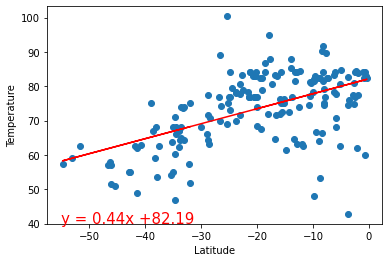

In [40]:
sLat = Scity['Lat']
sTemp = Scity['Max Temp']
linreg(sLat,sTemp)
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.annotate(line_eq,(-55,40),fontsize=15,color="red")
plt.savefig("Southern Hemisphere - Max Temp vs. Latitude Linear Regression.png")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.25741713916017644


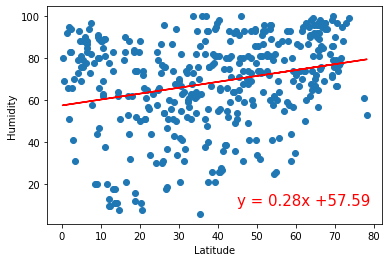

In [44]:
nLat = Ncity['Lat']
nHum = Ncity['Humidity']
linreg(nLat,nHum)
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq,(45,10),fontsize=15,color="red")
plt.savefig("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.2732963118339248


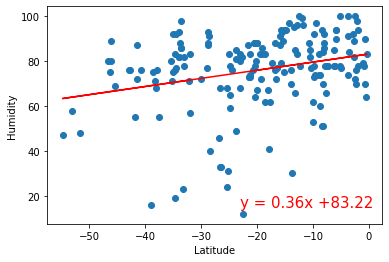

In [47]:
sLat = Scity['Lat']
sHum = Scity['Humidity']
linreg(sLat,sHum)
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq,(-23,15),fontsize=15,color="red")
plt.savefig("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.19369562798086454


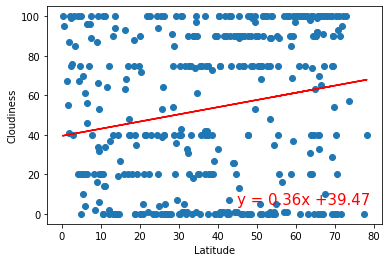

In [50]:
nLat = Ncity['Lat']
nCld = Ncity['Cloudiness']
linreg(nLat,nCld)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq,(45,5),fontsize=15,color="red")
plt.savefig("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.25462653590626255


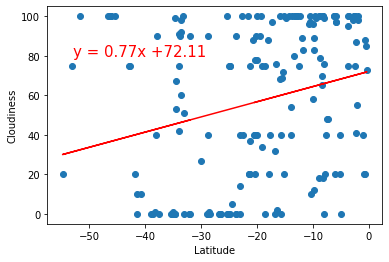

In [52]:
sLat = Scity['Lat']
sCld = Scity['Cloudiness']
linreg(sLat,sCld)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq,(-53,80),fontsize=15,color="red")
plt.savefig("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.19413744323419646


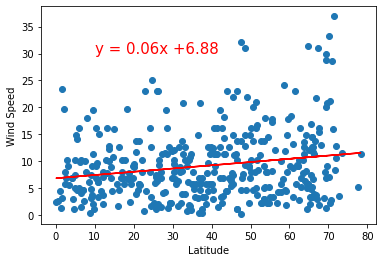

In [54]:
nLat = Ncity['Lat']
nSpd = Ncity['Wind Speed']
linreg(nLat,nSpd)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line_eq,(10,30),fontsize=15,color="red")
plt.savefig("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.08860537837168958


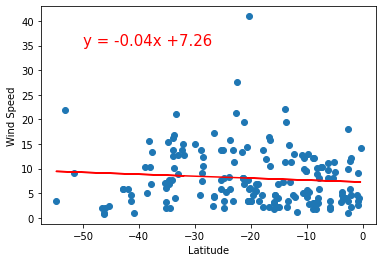

In [56]:
sLat = Scity['Lat']
sSpd = Scity['Wind Speed']
linreg(sLat,sSpd)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line_eq,(-50,35),fontsize=15,color="red")
plt.savefig("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression.png")
plt.show()